# MLP Car Price Prediction

## By: Mustafa Yildirim

Importing Libraries

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense
import kagglehub
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Downloading the dataset

In [2]:
path = kagglehub.dataset_download("vijayaadithyanvg/car-price-predictionused-cars")

Analyzing the dataset

In [3]:
file_path = f"{path}/car data.csv"
cars = pd.read_csv(file_path)

In [4]:
cars.shape

(301, 9)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
cars.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Preparing the data for training

In [8]:
cars = cars.drop(['Car_Name'], axis=1)

y = cars['Selling_Price']

X = cars.drop('Selling_Price', axis=1)

In [9]:
cars.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Selling_Price'}>],
       [<Axes: title={'center': 'Present_Price'}>,
        <Axes: title={'center': 'Driven_kms'}>],
       [<Axes: title={'center': 'Owner'}>, <Axes: >]], dtype=object)

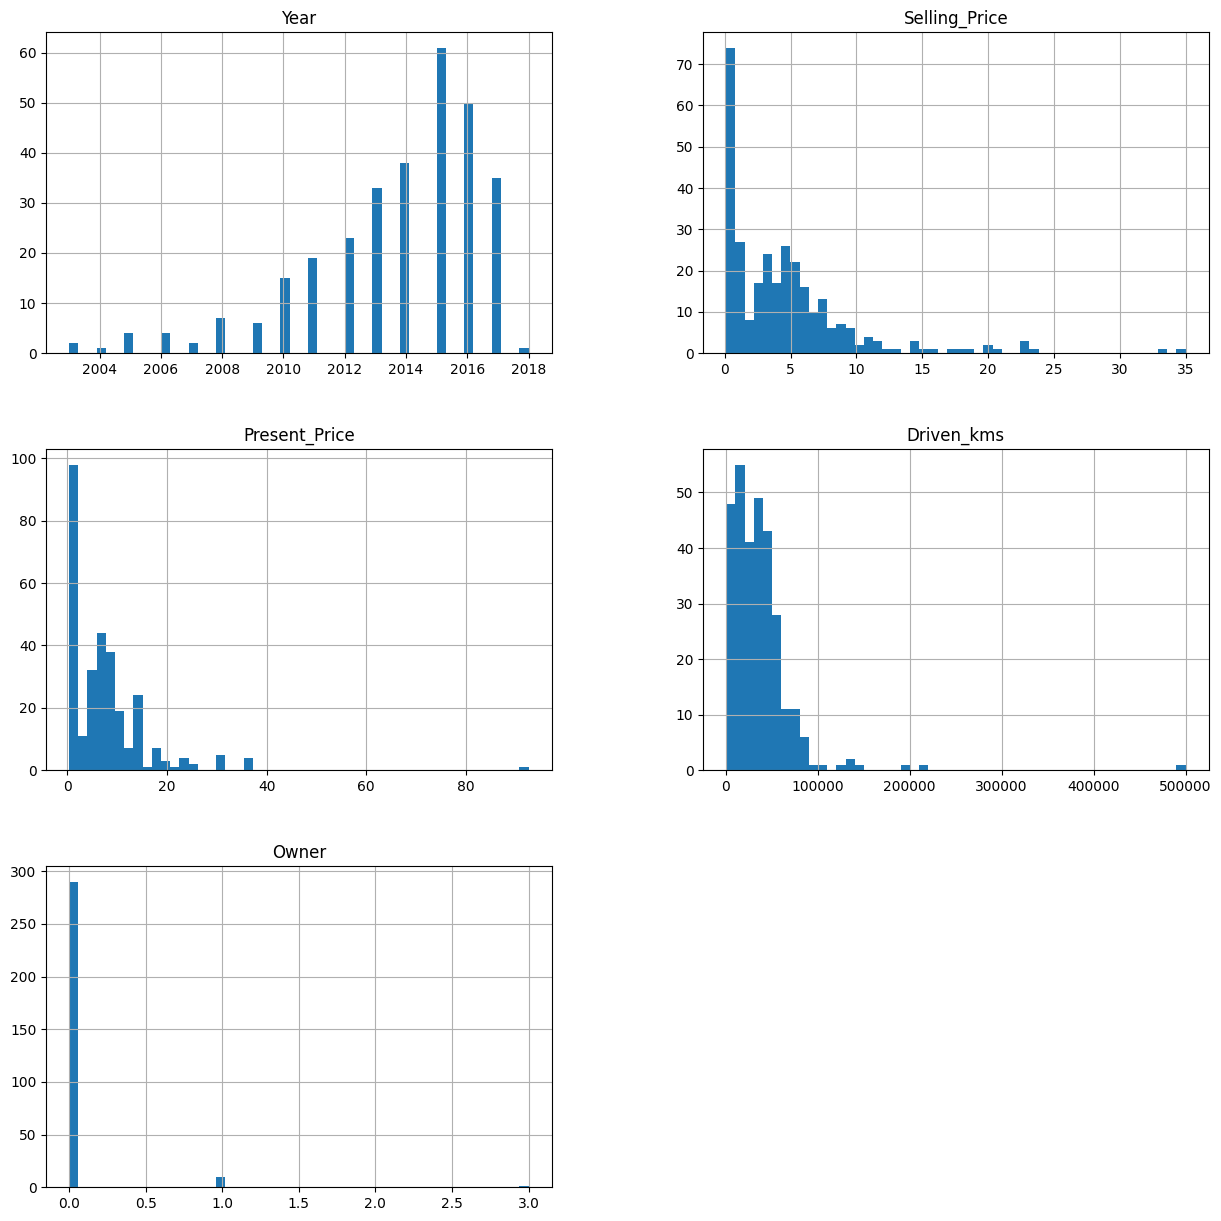

In [10]:
cars.hist(figsize=(15, 15), bins=50)

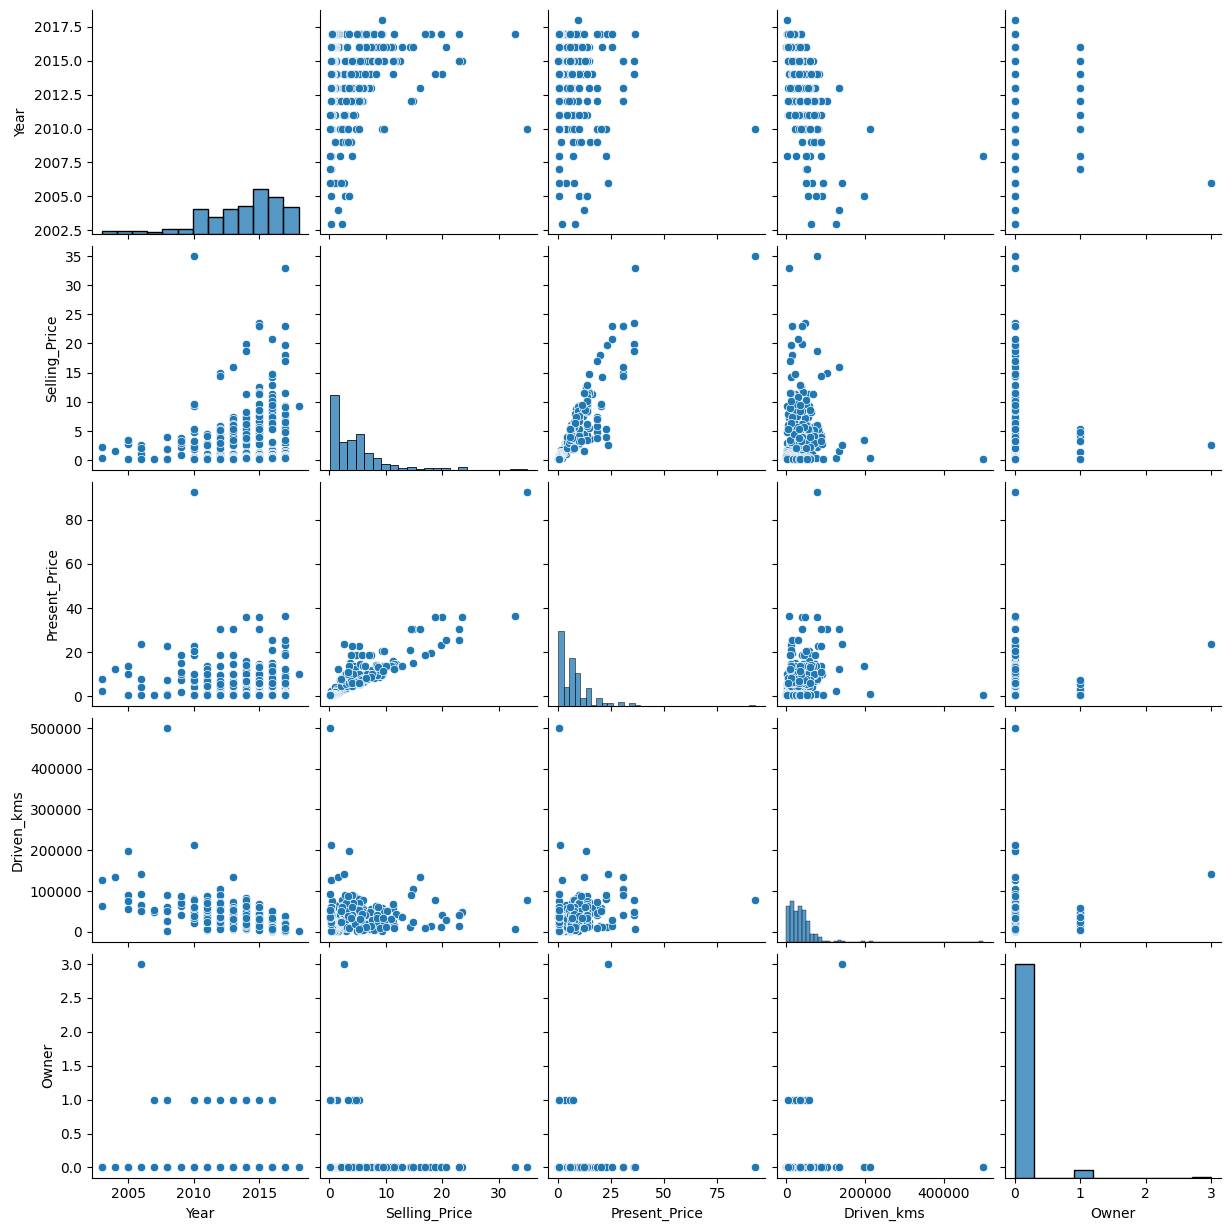

In [11]:
sns.pairplot(cars)

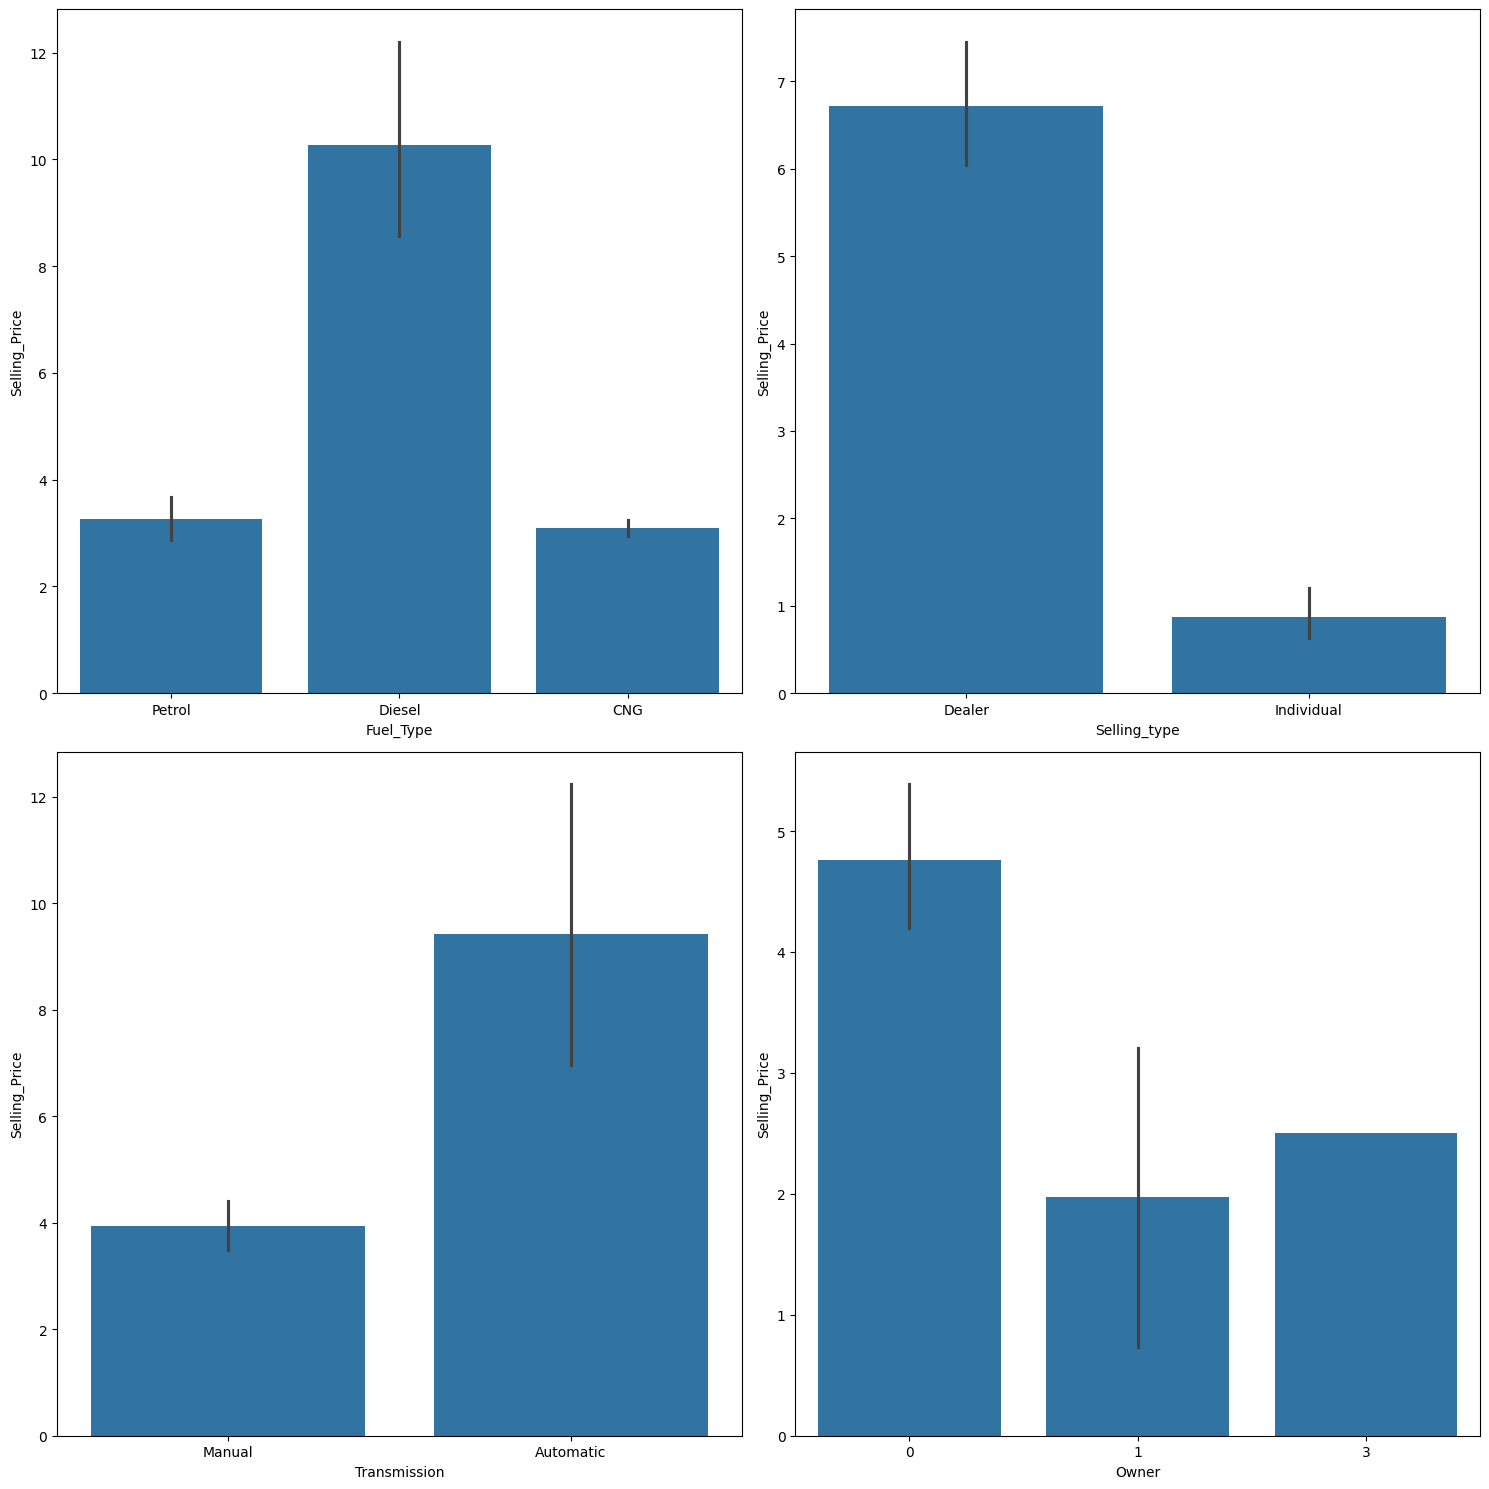

In [12]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
sns.barplot(x='Fuel_Type', y='Selling_Price', data=cars)

plt.subplot(2, 2, 2)
sns.barplot(x='Selling_type', y='Selling_Price', data=cars)

plt.subplot(2, 2, 3)
sns.barplot(x='Transmission', y='Selling_Price', data=cars)

plt.subplot(2, 2, 4)
sns.barplot(x='Owner', y='Selling_Price', data=cars)

plt.tight_layout()
plt.show()

In [13]:
x = pd.get_dummies(X, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

x.head()

,Year,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,5.59,27000,0,False,True,False,True
1,2013,9.54,43000,0,True,False,False,True
2,2017,9.85,6900,0,False,True,False,True
3,2011,4.15,5200,0,False,True,False,True
4,2014,6.87,42450,0,True,False,False,True


In [14]:
# Initialize scaler
scaler = StandardScaler()

# Fit and transform the features
x_scaled = scaler.fit_transform(x)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

Initializing the model

In [16]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])


In [17]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,681 (61.25 KB)

 Trainable params: 15,681 (61.25 KB)

 Non-trainable params: 0 (0.00 B)

Training the model

In [19]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 49.2399 - mae: 4.4873 - val_loss: 45.4457 - val_mae: 5.0244
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 59.7424 - mae: 4.4789 - val_loss: 42.5198 - val_mae: 4.7814
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 42.8529 - mae: 3.8136 - val_loss: 37.3361 - val_mae: 4.4091
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 47.6003 - mae: 4.1927 - val_loss: 29.8504 - val_mae: 3.9456
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 35.3961 - mae: 3.4946 - val_loss: 19.8219 - val_mae: 3.1938
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.8841 - mae: 2.4463 - val_loss: 9.9034 - val_mae: 2.2784
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.3375 - mae: 2.2284 - val_loss: 4.9666 - val_mae: 1.8209
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.9744 - mae: 2.1249 - val_loss: 4.9371 - val_mae: 1.6836
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.7325 - 

In [20]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [21]:
train_mae = history.history['mae']
val_mae = history.history['val_mae']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

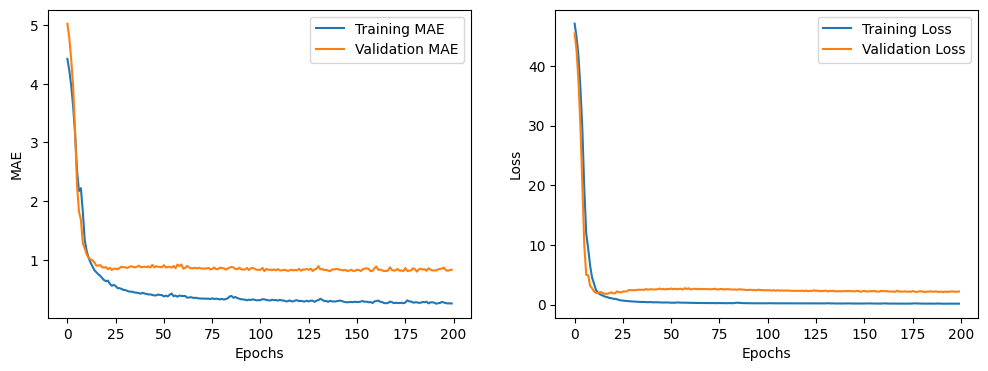

In [22]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


Testing the model

In [23]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7264 - mae: 0.5364 
Test Loss: 0.6956762075424194, Test MAE: 0.5415974855422974


Predicting with the model

In [24]:
pred = model.predict(X_test)

predictions = pd.DataFrame({"Actual Price": y_test.values, "Predicted Price": pred.flatten()})
print(predictions.head())

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
   Actual Price  Predicted Price
0          0.35         0.353181
1         10.11        10.760230
2          4.95         5.674285
3          0.15         0.149858
4          6.95         7.437445


In [25]:
predictions

,Actual Price,Predicted Price
0,0.35,0.353181
1,10.11,10.760230
2,4.95,5.674285
3,0.15,0.149858
4,6.95,7.437445
...,...,...
56,5.50,5.161431
57,9.50,10.611006
58,2.10,2.119343
59,7.40,6.940510


The model shows strong predictive performance, with predicted prices closely matching actual values across all ranges. 

High-priced items (e.g., 10.11 vs. 10.76) are estimated accurately, while even low-priced items (e.g., 0.35 vs. 0.353) have minimal absolute error. 

Some small over/underestimations (e.g., 6.95 vs. 7.43) exist but stay within a reasonable margin. 

Overall, the model captures trends well with no clear signs of overfitting.